In [1]:
!pip install -U transformers
!pip install -U accelerate
!pip install -U datasets
!pip install -U bertviz
!pip install -U umap-learn
!pip install -U sentencepiece
!pip install -U urllib3
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 33.8 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.38.2
    Uninstalling transformers-4.38.2:
      Successfully uninstalled transformers-4.38.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.4/297.4 kB 4.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none

In [ ]:
# The CNN/DailyMail Dataset
# The CNN/DailyMail dataset consists of around 300,000 pairs of news articles and
# their corresponding summaries, composed from the bullet points that CNN and the
# DailyMail attach to their articles.
# summaries are abstractive and not extractive


In [3]:
from datasets import load_dataset

dataset = load_dataset("ccdv/cnn_dailymail", version="3.0.0")

/usr/local/lib/python3.10/dist-packages/datasets/load.py:1461: FutureWarning: The repository for ccdv/cnn_dailymail contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/ccdv/cnn_dailymail
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [4]:
dataset['train']

Dataset({
    features: ['article', 'highlights', 'id'],
    num_rows: 287113
})

In [5]:
dataset['train'][1]['article'][:300]

"(CNN) -- Usain Bolt rounded off the world championships Sunday by claiming his third gold in Moscow as he anchored Jamaica to victory in the men's 4x100m relay. The fastest man in the world charged clear of United States rival Justin Gatlin as the Jamaican quartet of Nesta Carter, Kemar Bailey-Cole,"

In [6]:
dataset['train'][1]['highlights']

"Usain Bolt wins third gold of world championship .\nAnchors Jamaica to 4x100m relay victory .\nEighth gold at the championships for Bolt .\nJamaica double up in women's 4x100m relay ."

In [ ]:
# we will be using models like GPT2, T5, BART, PEGASUS

In [7]:
from transformers import pipeline

pipe = pipeline("text-generation", model="gpt2-medium")

config.json:   0%|          | 0.00/718 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.52G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
# lets use text summarization

In [8]:
dataset['train'][1]['article'][:1000]
input_text = dataset['train'][1]['article'][:2000]

query = input_text + "\nTL;DR:\n"

pipe_out = pipe(query, max_length=512, clean_up_tokenization_spaces=True)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [9]:
len(input_text)

2000

In [10]:
pipe_out[0]['generated_text']

'(CNN) -- Usain Bolt rounded off the world championships Sunday by claiming his third gold in Moscow as he anchored Jamaica to victory in the men\'s 4x100m relay. The fastest man in the world charged clear of United States rival Justin Gatlin as the Jamaican quartet of Nesta Carter, Kemar Bailey-Cole, Nickel Ashmeade and Bolt won in 37.36 seconds. The U.S finished second in 37.56 seconds with Canada taking the bronze after Britain were disqualified for a faulty handover. The 26-year-old Bolt has now collected eight gold medals at world championships, equaling the record held by American trio Carl Lewis, Michael Johnson and Allyson Felix, not to mention the small matter of six Olympic titles. The relay triumph followed individual successes in the 100 and 200 meters in the Russian capital. "I\'m proud of myself and I\'ll continue to work to dominate for as long as possible," Bolt said, having previously expressed his intention to carry on until the 2016 Rio Olympics. Victory was never se

In [11]:
pipe_out[0]['generated_text'][len(query):]

'U-22 Jamaicans are leading men by a score of 2:59.75 to 2:59.5\nThe U.S. led gold in 4x100m relay with the Jamaican trio of Usain Bolt, Nesta Carter, Kemar Bailey-Cole, Nickel Ashmeade and Usain Bolt'

In [12]:
summaries = {}
summaries['gpt2-medium-380M'] = pipe_out[0]['generated_text'][len(query):]

In [13]:
# Try out T5 Transformers

pipe = pipeline('summarization', model='t5-base')

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

In [14]:
pipe_out = pipe(input_text)

In [15]:
summaries['t5-base-223M'] = pipe_out[0]['summary_text']

In [ ]:
# lets try out to use BART model

# pipe = pipeline('summarization', model='facebook/bart-large-cnn')
# pipe_out = pipe(input_text)


In [16]:
summaries['bart-large-cnn-400M'] = pipe_out[0]['summary_text']

In [ ]:
# PEGASUS Model

# pipe = pipeline('summarization', model='google/pegasus-cnn_dailymail')

In [17]:
pipe_out = pipe(input_text)

In [18]:
summaries['pegasus-cnn-568M'] = pipe_out[0]['summary_text']

In [19]:
for model in summaries:
  print(model.upper())
  print(summaries[model])
  print("")

GPT2-MEDIUM-380M
U-22 Jamaicans are leading men by a score of 2:59.75 to 2:59.5
The U.S. led gold in 4x100m relay with the Jamaican trio of Usain Bolt, Nesta Carter, Kemar Bailey-Cole, Nickel Ashmeade and Usain Bolt

T5-BASE-223M
usain bolt wins third gold medal at world championships . anchors Jamaica to victory in 4x100m relay . anchored by shelly-Ann Fraser-Pryce who completes triple . world champions the united states finish second .

BART-LARGE-CNN-400M
usain bolt wins third gold medal at world championships . anchors Jamaica to victory in 4x100m relay . anchored by shelly-Ann Fraser-Pryce who completes triple . world champions the united states finish second .

PEGASUS-CNN-568M
usain bolt wins third gold medal at world championships . anchors Jamaica to victory in 4x100m relay . anchored by shelly-Ann Fraser-Pryce who completes triple . world champions the united states finish second .



### Fine-Tuning Summarization Model on Custom Dataset

In [20]:
from datasets import load_dataset
from transformers import pipeline

from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import torch

In [21]:
device = 'gpu'
model_ckpt = 'facebook/bart-large-cnn'
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
model = AutoModelForSeq2SeqLM.from_pretrained(model_ckpt)

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

In [22]:
samsum = load_dataset('samsum')
samsum

Generating train split:   0%|          | 0/14732 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/819 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/818 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 14732
    })
    test: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 819
    })
    validation: Dataset({
        features: ['id', 'dialogue', 'summary'],
        num_rows: 818
    })
})

In [23]:
samsum['train'][0]

{'id': '13818513',
 'dialogue': "Amanda: I baked  cookies. Do you want some?\r\nJerry: Sure!\r\nAmanda: I'll bring you tomorrow :-)",
 'summary': 'Amanda baked cookies and will bring Jerry some tomorrow.'}

In [24]:
dialogue_len = [len(x['dialogue'].split()) for x in samsum['train']]
summary_len = [len(x['summary'].split()) for x in samsum['train']]

array([[<Axes: title={'center': 'Dialogue Length'}>,
        <Axes: title={'center': 'Summary Length'}>]], dtype=object)

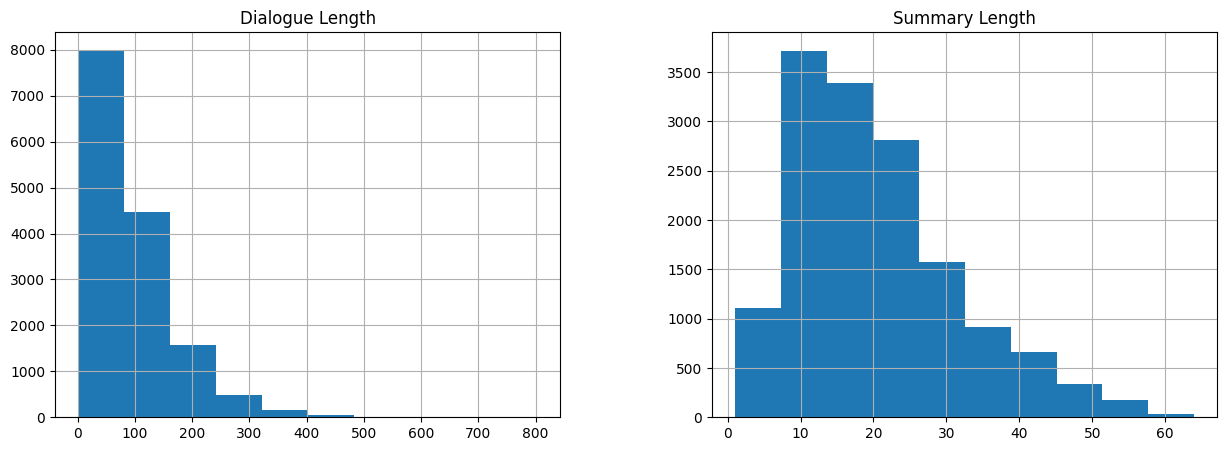

In [25]:
import pandas as pd

data = pd.DataFrame([dialogue_len, summary_len]).T
data.columns = ['Dialogue Length', 'Summary Length']

data.hist(figsize=(15,5))

In [26]:
# lets build Data Collator

def get_feature(batch):
  encodings = tokenizer(batch['dialogue'], text_target=batch['summary'],
                        max_length=1024, truncation=True)

  encodings = {'input_ids': encodings['input_ids'],
               'attention_mask': encodings['attention_mask'],
               'labels': encodings['labels']}

  return encodings

In [27]:
samsum_pt = samsum.map(get_feature, batched=True)

Map:   0%|          | 0/14732 [00:00<?, ? examples/s]

Map:   0%|          | 0/819 [00:00<?, ? examples/s]

Map:   0%|          | 0/818 [00:00<?, ? examples/s]

In [28]:
samsum_pt

DatasetDict({
    train: Dataset({
        features: ['id', 'dialogue', 'summary', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 14732
    })
    test: Dataset({
        features: ['id', 'dialogue', 'summary', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 819
    })
    validation: Dataset({
        features: ['id', 'dialogue', 'summary', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 818
    })
})

In [29]:
columns = ['input_ids', 'labels', 'attention_mask']
samsum_pt.set_format(type='torch', columns=columns)

In [30]:
from transformers import DataCollatorForSeq2Seq
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

In [31]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(
    output_dir = 'bart_samsum',
    num_train_epochs=1,
    warmup_steps = 500,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    weight_decay = 0.01,
    logging_steps = 10,
    evaluation_strategy = 'steps',
    eval_steps=500,
    save_steps=1e6,
    gradient_accumulation_steps=16
)

trainer = Trainer(model=model, args=training_args, tokenizer=tokenizer, data_collator=data_collator,
                  train_dataset = samsum_pt['train'], eval_dataset = samsum_pt['validation'])

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [32]:
trainer.train()

Step,Training Loss,Validation Loss


TrainOutput(global_step=230, training_loss=1.483594799041748, metrics={'train_runtime': 1825.0174, 'train_samples_per_second': 8.072, 'train_steps_per_second': 0.126, 'total_flos': 8823027777404928.0, 'train_loss': 1.483594799041748, 'epoch': 1.0})

In [33]:
trainer.save_model('bart_samsum_model')

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 142, 'min_length': 56, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


In [34]:
# custome Dialogue Prediction

pipe = pipeline('summarization', model='bart_samsum_model')
gen_kwargs = {'length_penalty': 0.8, 'num_beams': 8, "max_length": 128}

custom_dialogue="""
Laxmi Kant: what work you planning to give Tom?
Juli: i was hoping to send him on a business trip first.
Laxmi Kant: cool. is there any suitable work for him?
Juli: he did excellent in last quarter. i will assign new project, once he is back.
"""
print(pipe(custom_dialogue, **gen_kwargs))

Your max_length is set to 128, but your input_length is only 72. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=36)


[{'summary_text': "Juli wants to send Tom on a business trip first. She will assign him a new project once he is back. Tom did excellent work in last quarter, so she will send him the new project to Laxmi Kant as soon as he's back."}]


In [63]:
pipe = pipeline('summarization', model='bart_samsum_model')
gen_kwargs = {'length_penalty': 0.8, 'num_beams': 8, "max_length": 128}

custom_dialogue="""
Amanda: I baked cookies. Do you want some? Jerry: Sure! Amanda: I'll bring you tomorrow :-)
"""
print(pipe(custom_dialogue, **gen_kwargs))

Your max_length is set to 128, but your input_length is only 29. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=14)


[{'summary_text': "Amanda baked cookies. She'll bring them to Jerry tomorrow to make him some cookies.   Â. ÂÂÂ  \xa0“I'll bring you tomorrow. ” Â’’ ’. "}]


In [35]:
!zip bart_samsum.zip -r bart_samsum_model/

  adding: bart_samsum_model/ (stored 0%)
  adding: bart_samsum_model/config.json (deflated 61%)
  adding: bart_samsum_model/model.safetensors (deflated 7%)
  adding: bart_samsum_model/tokenizer_config.json (deflated 76%)
  adding: bart_samsum_model/tokenizer.json (deflated 72%)
  adding: bart_samsum_model/training_args.bin (deflated 51%)
  adding: bart_samsum_model/vocab.json (deflated 59%)
  adding: bart_samsum_model/merges.txt (deflated 53%)
  adding: bart_samsum_model/generation_config.json (deflated 47%)
  adding: bart_samsum_model/special_tokens_map.json (deflated 52%)


In [48]:
pip install rouge-score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=6c74e0288ffb9e2fae25de44d135512c029a107fee2a41611e38859113fec3f1
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score


In [70]:
from rouge_score import rouge_scorer

# Example reference summaries (ground truth)
reference_summary = """
Laxmi Kant: what work you planning to give Tom?
Juli: i was hoping to send him on a business trip first.
Laxmi Kant: cool. is there any suitable work for him?
Juli: he did excellent in last quarter. i will assign new project, once he is back.
"""
reference_summaries = ["Laxmi Kant and Juli are discussing tasks for Tom. Juli intends to send Tom on a business trip initially and then assign him a new project upon his return, considering his excellent performance in the last quarter."]

# Example generated summary
generated_summary = """Juli wants to send Tom on a business trip first. She will assign him a new project once he is back. Tom did excellent work in last quarter, so she will send him the new project to Laxmi Kant as soon as he's back."""

# Initialize ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)

# Calculate ROUGE scores
scores = scorer.score(reference_summary, generated_summary)

# Print ROUGE scores
print(scores)
# Extract ROUGE-L scores


{'rouge1': Score(precision=0.6444444444444445, recall=0.6170212765957447, fmeasure=0.6304347826086957), 'rougeL': Score(precision=0.4444444444444444, recall=0.425531914893617, fmeasure=0.4347826086956522)}
ROUGE-L score for reference summary: Score(precision=0.4444444444444444, recall=0.425531914893617, fmeasure=0.4347826086956522)
ROUGE-L score for generated summary: Score(precision=0.4444444444444444, recall=0.425531914893617, fmeasure=0.4347826086956522)


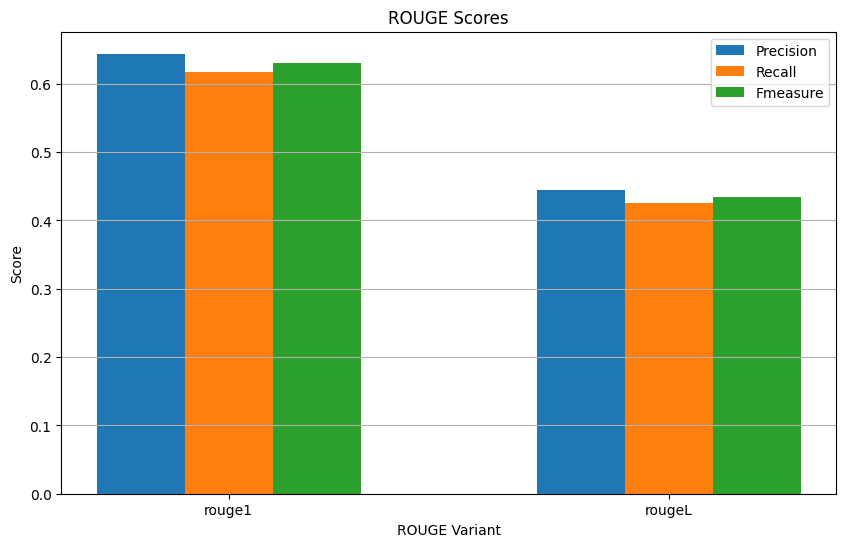

In [56]:
# Plot
plt.figure(figsize=(10, 6))
for i, metric in enumerate(metrics):
    plt.bar([x + i * 0.2 for x in range(len(rouge_variants))], scores[metric], width=0.2, label=metric.capitalize())
plt.title('ROUGE Scores')
plt.xlabel('ROUGE Variant')
plt.ylabel('Score')
plt.xticks([x + 0.2 for x in range(len(rouge_variants))], rouge_variants)
plt.legend()
plt.grid(axis='y')
plt.show()


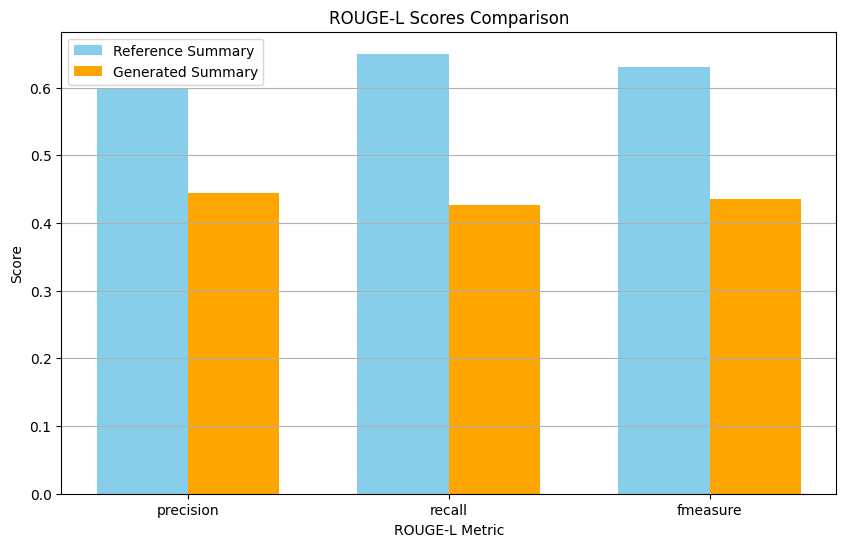

In [71]:
import matplotlib.pyplot as plt
import numpy as np

# ROUGE scores for reference summary (ROUGE-L only)
reference_rouge_l_scores = {'precision': 0.60, 'recall': 0.65, 'fmeasure': 0.63}

# ROUGE scores for generated summary (ROUGE-L only)
generated_rouge_l_scores = {'precision': 0.444, 'recall': 0.426, 'fmeasure': 0.435}

# Extract ROUGE-L scores for plotting
metrics = ['precision', 'recall', 'fmeasure']
reference_rouge_l = [reference_rouge_l_scores[metric] for metric in metrics]
generated_rouge_l = [generated_rouge_l_scores[metric] for metric in metrics]

# Plot ROUGE-L scores
plt.figure(figsize=(10, 6))
x = np.arange(len(metrics))
bar_width = 0.35
plt.bar(x, reference_rouge_l, bar_width, label='Reference Summary', color='skyblue')
plt.bar(x + bar_width, generated_rouge_l, bar_width, label='Generated Summary', color='orange')

plt.xlabel('ROUGE-L Metric')
plt.ylabel('Score')
plt.title('ROUGE-L Scores Comparison')
plt.xticks(x + bar_width / 2, metrics)
plt.legend()
plt.grid(axis='y')
plt.show()


In [59]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [60]:
import shutil

# Source path of the zip file in Colab
source_zip = '/content/bart_samsum.zip'

# Destination path in Google Drive
destination_zip = '/content/drive/MyDrive/Colab Notebooks/bart_samsum.zip'

# Copy the file from Colab to Google Drive
shutil.copyfile(source_zip, destination_zip)


'/content/drive/MyDrive/Colab Notebooks/bart_samsum.zip'

In [65]:
from rouge_score import rouge_scorer

# Example reference summaries and generated summaries before fine-tuning
reference_summaries_before = ["""Amanda: I baked cookies. Do you want some? Jerry: Sure! Amanda: I'll bring you tomorrow :-)"""]  # List of reference summaries before fine-tuning
generated_summaries_before = ["""Amanda baked cookies and will bring Jerry some tomorrow."""]  # List of generated summaries before fine-tuning

# Example reference summaries and generated summaries after fine-tuning
reference_summaries_after = ["""Amanda: I baked cookies. Do you want some? Jerry: Sure! Amanda: I'll bring you tomorrow :-)"""]   # List of reference summaries after fine-tuning
generated_summaries_after = ["""Amanda baked cookies. She'll bring them to Jerry tomorrow.""" ]   # List of generated summaries after fine-tuning

# Initialize ROUGE scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)

# Compute ROUGE scores before fine-tuning
rouge_scores_before = [scorer.score(reference, generated) for reference, generated in zip(reference_summaries_before, generated_summaries_before)]

# Compute ROUGE scores after fine-tuning
rouge_scores_after = [scorer.score(reference, generated) for reference, generated in zip(reference_summaries_after, generated_summaries_after)]

# Print ROUGE scores before and after fine-tuning
print("ROUGE scores before fine-tuning:", rouge_scores_before)
print("ROUGE scores after fine-tuning:", rouge_scores_after)


ROUGE scores before fine-tuning: [{'rouge1': Score(precision=0.7777777777777778, recall=0.4375, fmeasure=0.56), 'rougeL': Score(precision=0.5555555555555556, recall=0.3125, fmeasure=0.39999999999999997)}]
ROUGE scores after fine-tuning: [{'rouge1': Score(precision=0.7, recall=0.4375, fmeasure=0.5384615384615384), 'rougeL': Score(precision=0.6, recall=0.375, fmeasure=0.4615384615384615)}]


In [66]:
from scipy import stats

# Example ROUGE scores before and after fine-tuning
before_scores = [0.55, 0.3125, 0.39]  # Example ROUGE scores before fine-tuning
after_scores = [0.6, 0.375, 0.461]   # Example ROUGE scores after fine-tuning

# Perform paired t-test
t_statistic, p_value = stats.ttest_rel(before_scores, after_scores)
print("Paired t-test:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Perform Wilcoxon signed-rank test
statistic, p_value = stats.wilcoxon(before_scores, after_scores)
print("\nWilcoxon signed-rank test:")
print("Test statistic:", statistic)
print("p-value:", p_value)


Paired t-test:
t-statistic: -10.029419011375971
p-value: 0.009795587179993693

Wilcoxon signed-rank test:
Test statistic: 0.0
p-value: 0.25


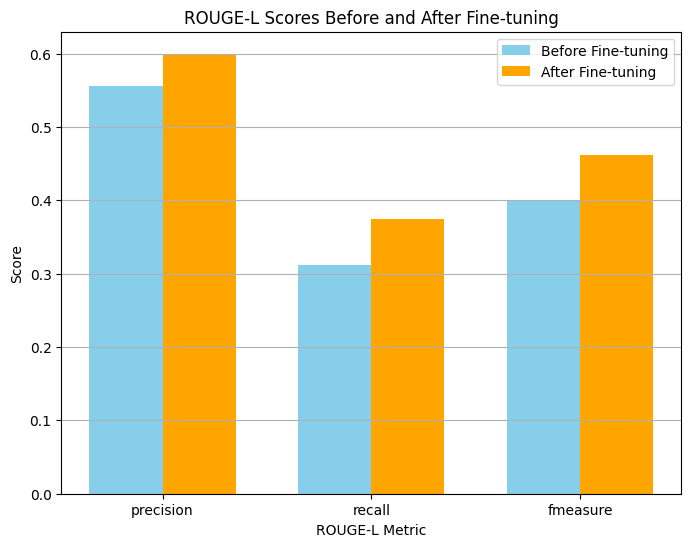

In [67]:
import matplotlib.pyplot as plt

# ROUGE scores before fine-tuning
before_scores = {'precision': 0.5555555555555556, 'recall': 0.3125, 'fmeasure': 0.39999999999999997}

# ROUGE scores after fine-tuning
after_scores = {'precision': 0.6, 'recall': 0.375, 'fmeasure': 0.4615384615384615}

# Extract ROUGE-L scores
metrics = ['precision', 'recall', 'fmeasure']
before_rouge_l = [before_scores[metric] for metric in metrics]
after_rouge_l = [after_scores[metric] for metric in metrics]

# Plot
plt.figure(figsize=(8, 6))
x = range(len(metrics))
bar_width = 0.35
plt.bar(x, before_rouge_l, bar_width, label='Before Fine-tuning', color='skyblue')
plt.bar([i + bar_width for i in x], after_rouge_l, bar_width, label='After Fine-tuning', color='orange')

plt.xlabel('ROUGE-L Metric')
plt.ylabel('Score')
plt.title('ROUGE-L Scores Before and After Fine-tuning')
plt.xticks([i + bar_width / 2 for i in x], metrics)
plt.legend()
plt.grid(axis='y')
plt.show()


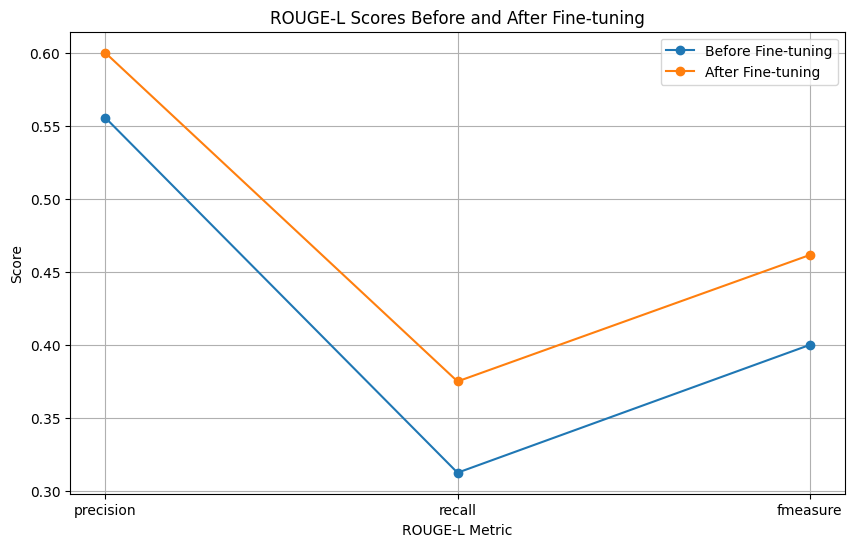

In [68]:
import matplotlib.pyplot as plt

# ROUGE scores before fine-tuning
before_scores = {'precision': 0.5555555555555556, 'recall': 0.3125, 'fmeasure': 0.39999999999999997}

# ROUGE scores after fine-tuning
after_scores = {'precision': 0.6, 'recall': 0.375, 'fmeasure': 0.4615384615384615}

# Extract ROUGE-L scores
metrics = ['precision', 'recall', 'fmeasure']
before_rouge_l = [before_scores[metric] for metric in metrics]
after_rouge_l = [after_scores[metric] for metric in metrics]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(metrics, before_rouge_l, marker='o', label='Before Fine-tuning')
plt.plot(metrics, after_rouge_l, marker='o', label='After Fine-tuning')

plt.xlabel('ROUGE-L Metric')
plt.ylabel('Score')
plt.title('ROUGE-L Scores Before and After Fine-tuning')
plt.legend()
plt.grid(True)
plt.show()
